# Imports

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read dataset

In [18]:
df = pd.read_csv('The Impact of Electronic Gadget Uses with Academic Performance among University Students (Responses) - Form Responses 1.csv')
df.head()

,Timestamp,Gender,Your study year,Which department,How many electronic devices do you use?,What is your recent latest CGPA ?,Is there an increase in your CGPA?,Average hour you spent using electronic devices for academic purposes in a day (hours).,What is the purpose of buying the device?
0,7/19/2022 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,7/21/2022 2:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,7/21/2022 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,8/22/2022 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,8/22/2022 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


In [19]:
# Rename certain columns for ease of use
df.rename({'Your study year':'StudyYear', 'Which department':'Department', 'How many electronic devices do you use?':'AmountOfDevices', 'What is your recent latest CGPA ?':'LatestCGPA', 'Is there an increase in your CGPA?':'TrendCGPA', 'Average hour you spent using electronic devices for academic purposes in a day (hours).':'HoursUsedForAcademic', 'What is the purpose of buying the device?':'PurposeOfBuying'}, inplace = True, axis=1)
df.head()

,Timestamp,Gender,StudyYear,Department,AmountOfDevices,LatestCGPA,TrendCGPA,HoursUsedForAcademic,PurposeOfBuying
0,7/19/2022 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,7/21/2022 2:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,7/21/2022 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,8/22/2022 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,8/22/2022 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


# Data preprocessing

In [20]:
# Check for nan values
df.isna().sum()

Timestamp               0
Gender                  0
StudyYear               0
Department              0
AmountOfDevices         0
LatestCGPA              0
TrendCGPA               0
HoursUsedForAcademic    0
PurposeOfBuying         0
dtype: int64

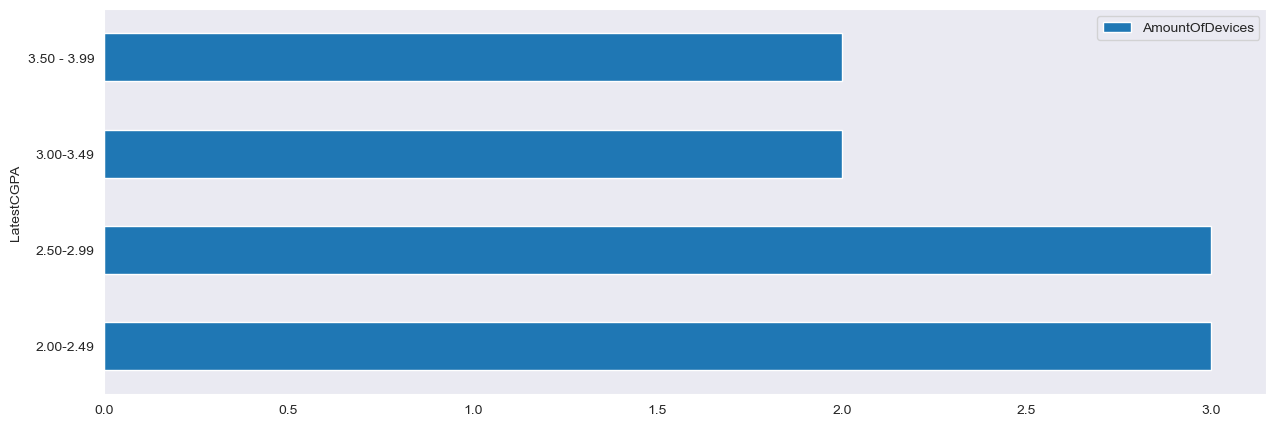

In [21]:
df.groupby('LatestCGPA').mean().round().plot(kind = 'barh', figsize = (15,5))
plt.grid()

In [22]:
# Convert categorical data to numerics for correlations
df = pd.get_dummies(df, columns=['Gender', 'StudyYear', 'Department', 'LatestCGPA', 'TrendCGPA', 'HoursUsedForAcademic', 'PurposeOfBuying'])

<AxesSubplot:>

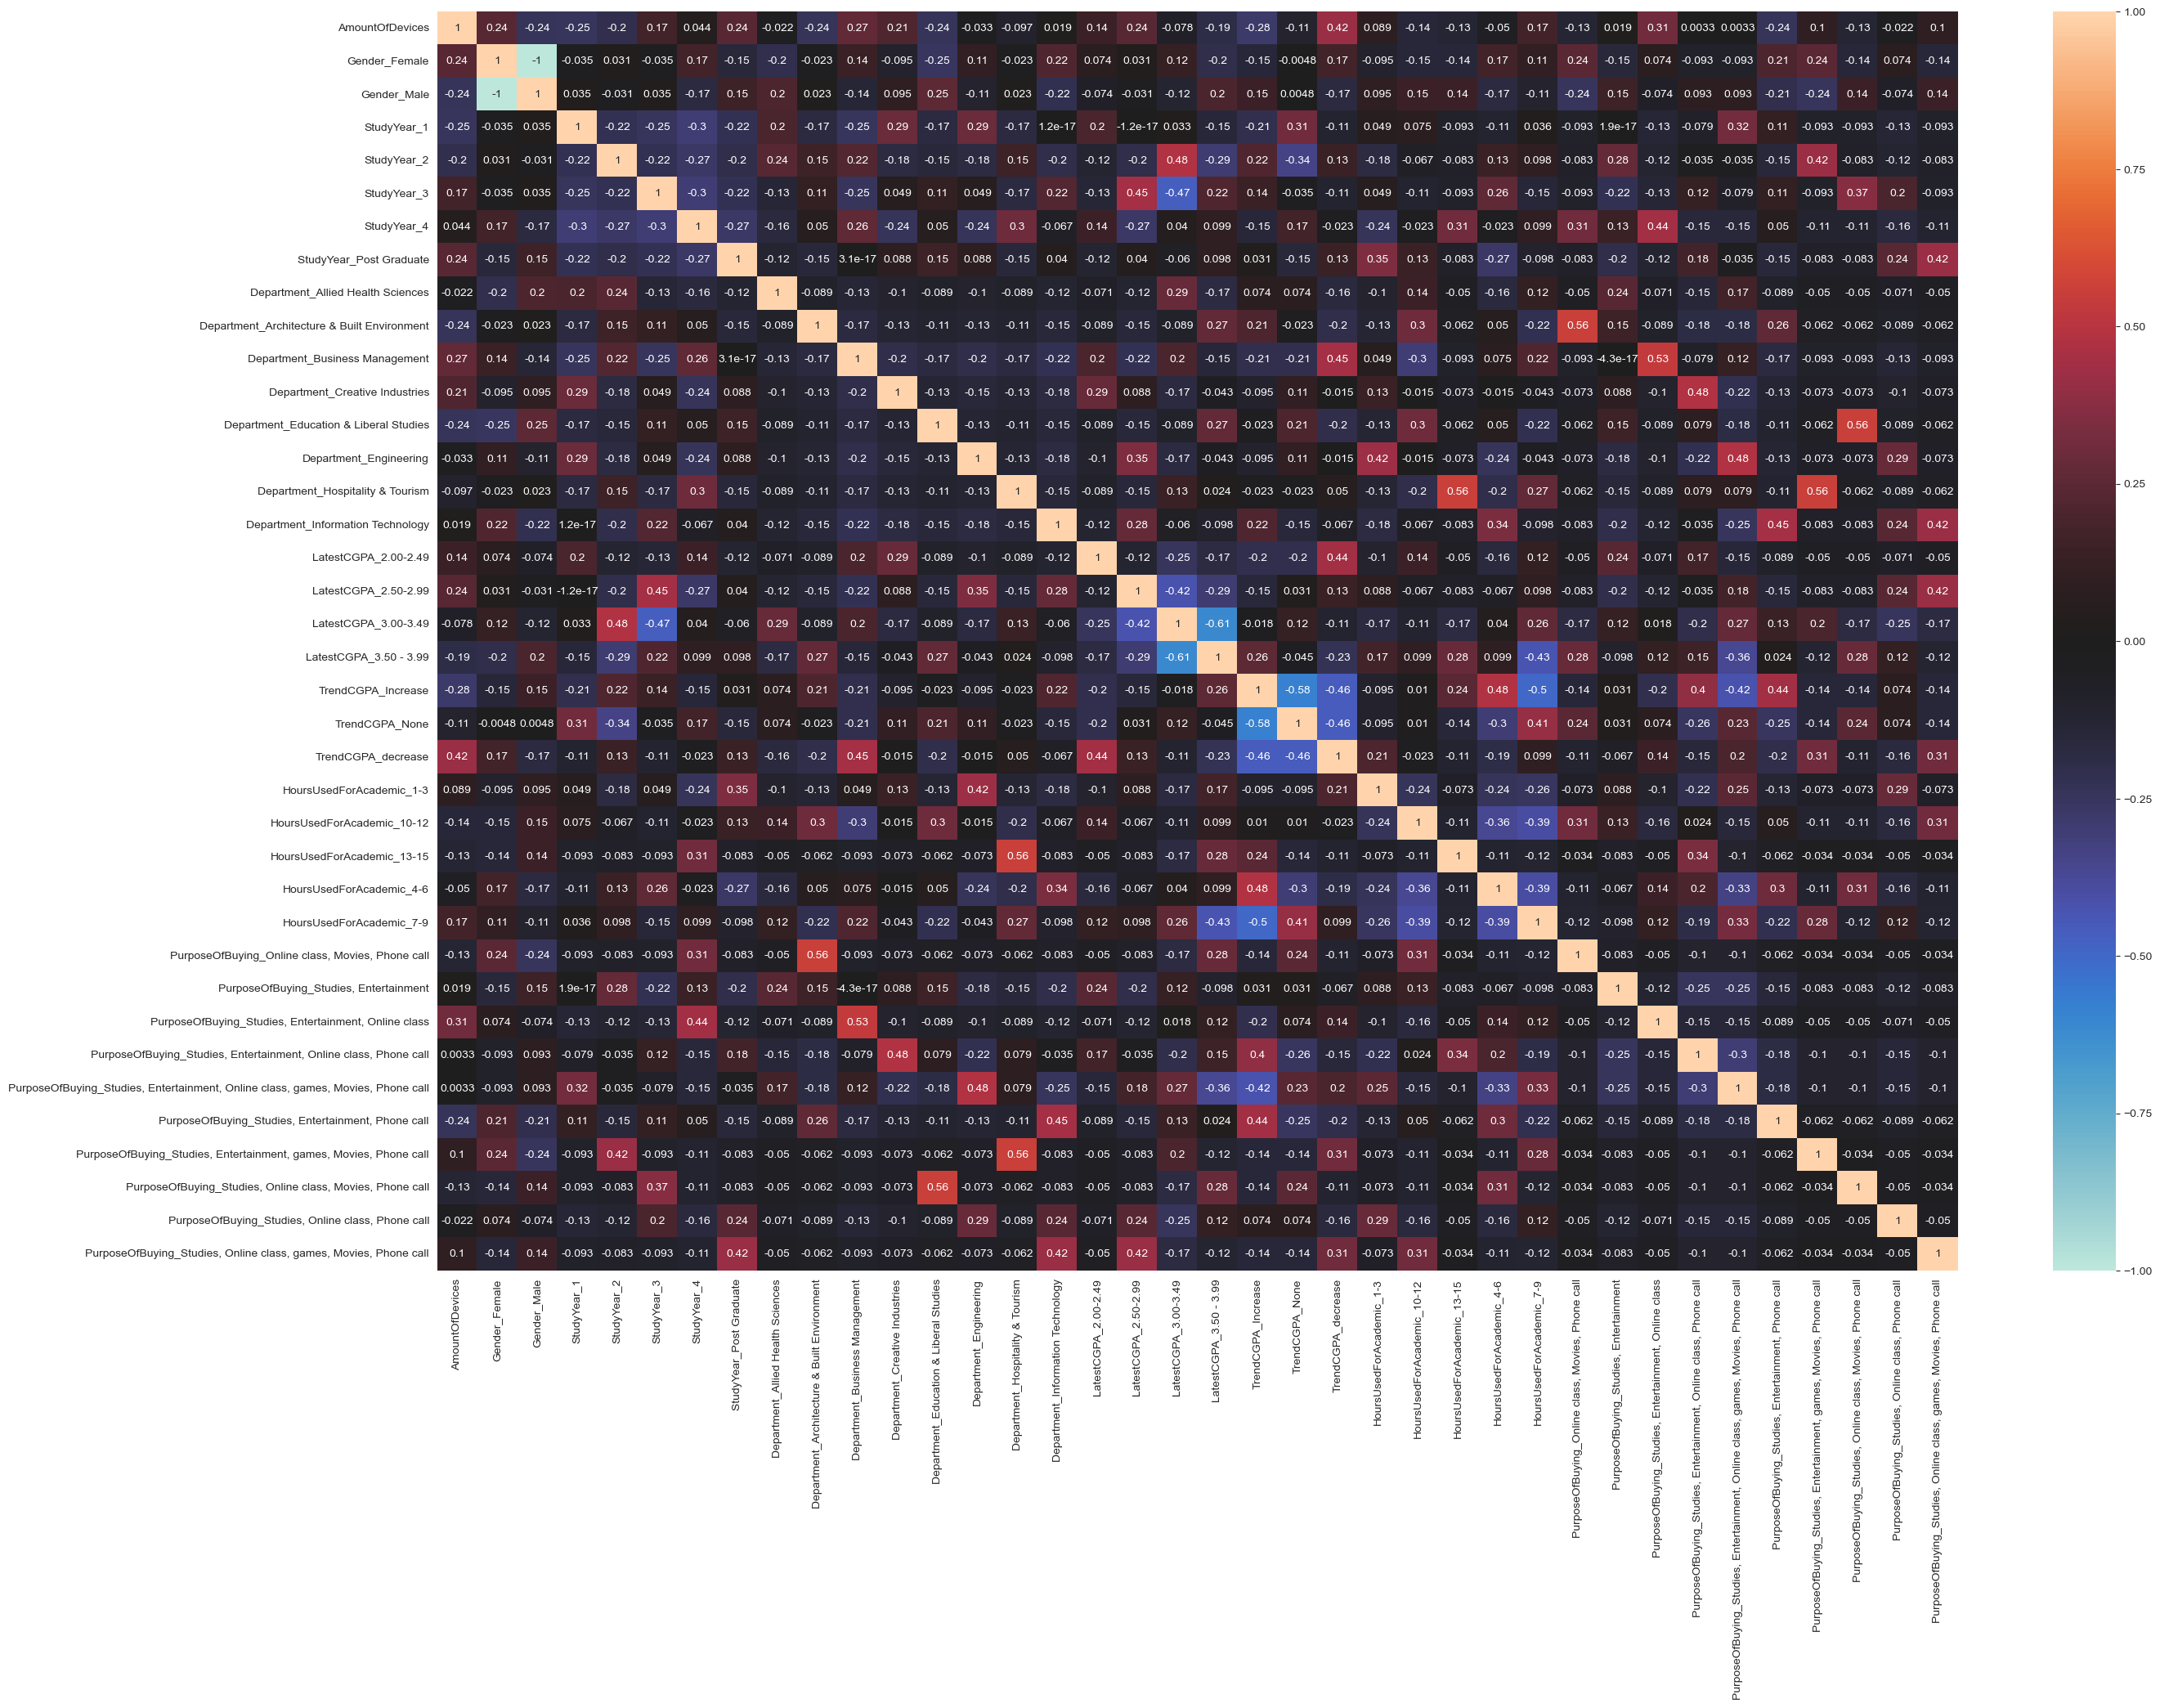

In [23]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)